<a href="https://colab.research.google.com/github/bwaves26/statclass/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(dplyr)
library(ggplot2)

In [ ]:
head(police_killings)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,5.6,28375,51367,54766,0.9379359,3,3,14.1,0.09768638,0.16850951
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.5,14678,27972,40930,0.6834107,2,1,28.8,0.06572379,0.11140236
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,16.8,25286,45365,54930,0.8258693,2,3,14.6,0.16629314,0.14731227
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,98.8,17194,48295,55909,0.8638144,3,3,11.7,0.12482727,0.05013293
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.7,33954,68785,49669,1.3848678,5,4,1.9,0.06354983,0.40395421
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,79,15523,20833,53596,0.3887044,1,1,58,0.07365145,0.10295519


In [ ]:
police_killings <- read.csv("police_killings.csv")

Warning message:
“There were 10 warnings in `filter()`.
The first warning was:
ℹ In argument: `&...`.
Caused by warning in `grepl()`:
! unable to translate 'Rub<cc>_<e5><a9>n Garc<cc>__a Villalpando' to a wide string
ℹ Run `dplyr::last_dplyr_warnings()` to see the 9 remaining warnings.”


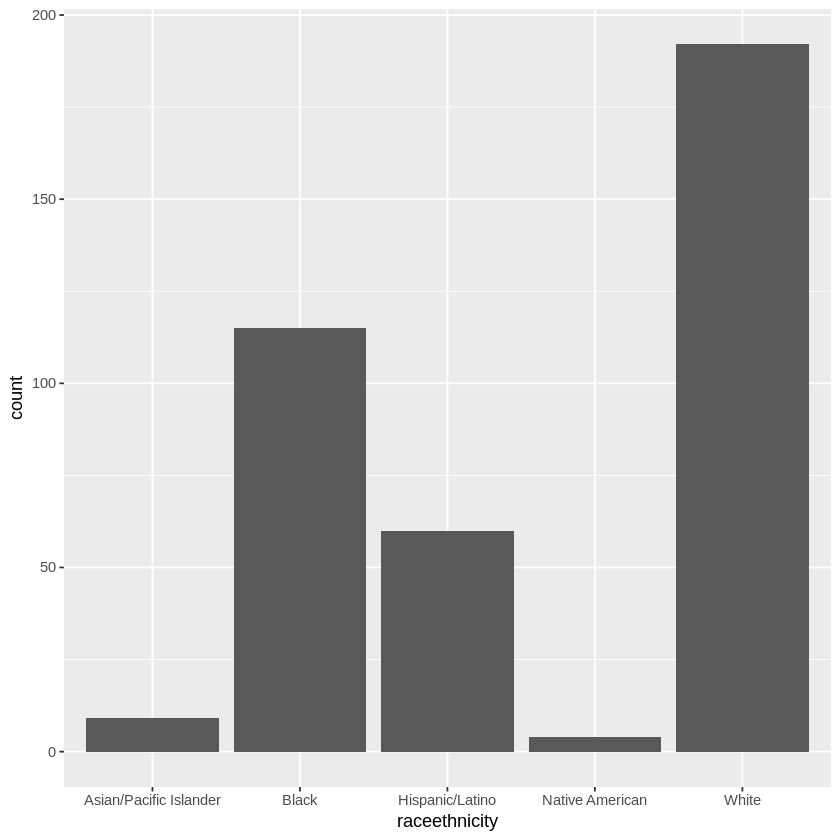

In [ ]:
police_killings_clean <- police_killings %>%
  filter(if_all(everything(), ~ !grepl("unknown|^0$", ., ignore.case = TRUE)))%>%
  filter(!is.na(county_bucket))

police_killings_clean %>%
  ggplot()+
  aes(x= raceethnicity)+
  geom_bar()



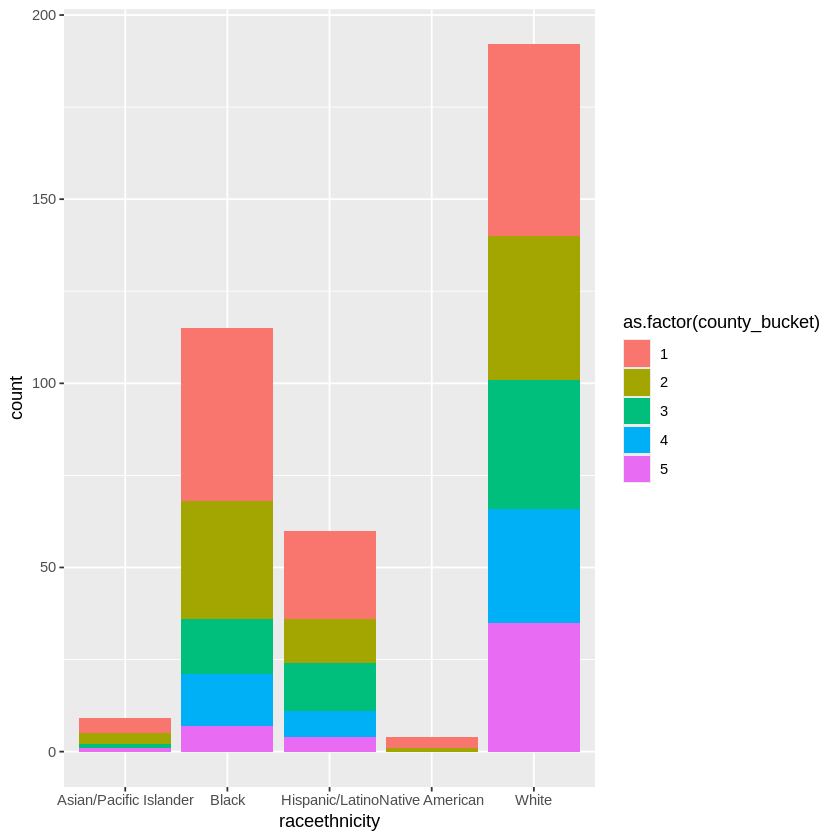

In [ ]:
# prompt: take this graph and fill by county_bucket quintile for each race

police_killings_clean %>%
  ggplot() +
  aes(x = raceethnicity, fill = as.factor(county_bucket)) +
  geom_bar()

In [ ]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    pop = as.numeric(pop),
    share_white = as.numeric(share_white),
    share_black = as.numeric(share_black),
    share_hispanic = as.numeric(share_hispanic)
  )

In [ ]:
head(police_killings_clean)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,whitepop,blackpop,hispanicpop
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,54766,0.9379359,3,3,14.1,0.09768638,0.16850951,2286.295,1152.595,211.624
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,40930,0.6834107,2,1,28.8,0.06572379,0.11140236,1489.722,1002.378,13.845
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,54930,0.8258693,2,3,14.6,0.16629314,0.14731227,3010.302,314.083,685.272
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,55909,0.8638144,3,3,11.7,0.12482727,0.05013293,52.116,26.058,4290.884
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,49669,1.3848678,5,4,1.9,0.06354983,0.40395421,6298.325,95.326,115.753
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,53596,0.3887044,1,1,58,0.07365145,0.10295519,327.740,360.514,3698.780


In [ ]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    whitepop = pop * share_white / 100,
    blackpop = pop * share_black / 100,
    hispanicpop = pop * share_hispanic / 100
  )

In [ ]:
black_total_pop <- sum(police_killings_clean$blackpop)
white_total_pop <- sum(police_killings_clean$whitepop)
hispanic_total_pop <- sum(police_killings_clean$hispanicpop)

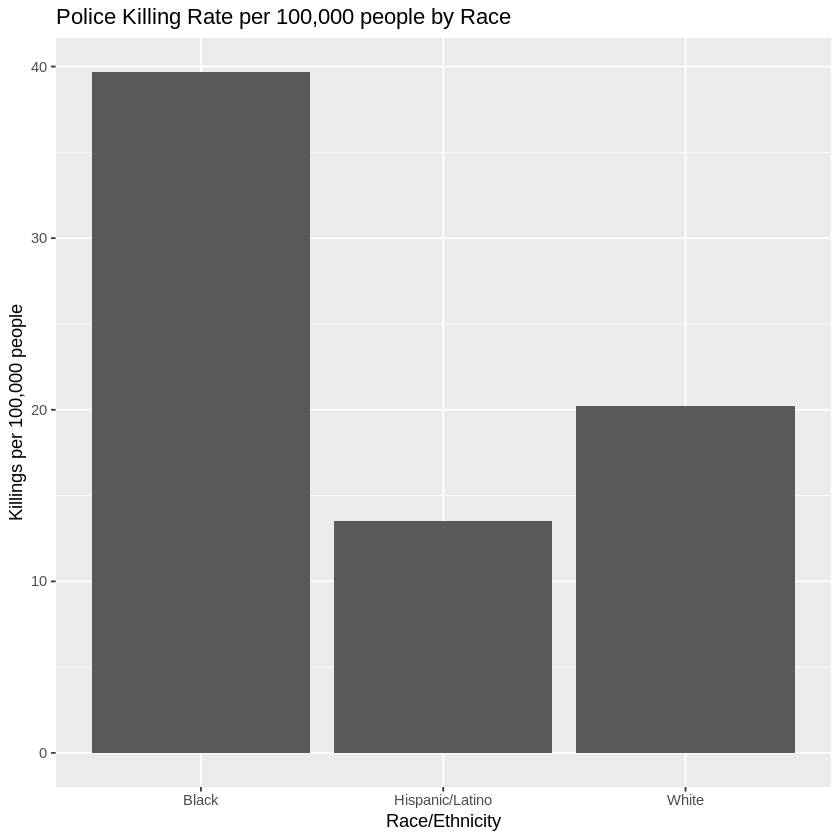

In [ ]:
# prompt: how do i make the graph based on rate (killings per population

# Calculate the number of killings per race
killings_by_race <- police_killings_clean %>%
  group_by(raceethnicity) %>%
  summarize(killings = n())

# Calculate the total population per race
population_by_race <- data.frame(
  raceethnicity = c("White", "Black", "Hispanic/Latino"),
  population = c(white_total_pop, black_total_pop, hispanic_total_pop)
)

# Merge the two data frames
killings_and_population <- merge(killings_by_race, population_by_race, by = "raceethnicity")

# Calculate the killings per 100,000 people
killings_and_population <- killings_and_population %>%
  mutate(rate = (killings / population) * 100000)


# Create the plot
ggplot(killings_and_population, aes(x = raceethnicity, y = rate)) +
  geom_col() +
  labs(title = "Police Killing Rate per 100,000 people by Race",
       x = "Race/Ethnicity",
       y = "Killings per 100,000 people")


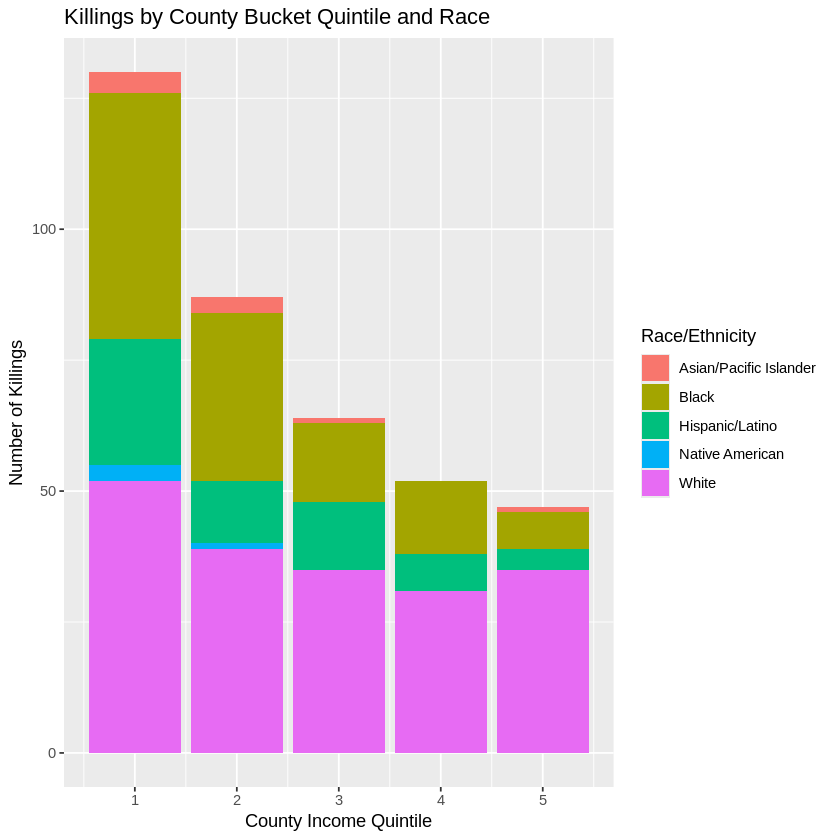

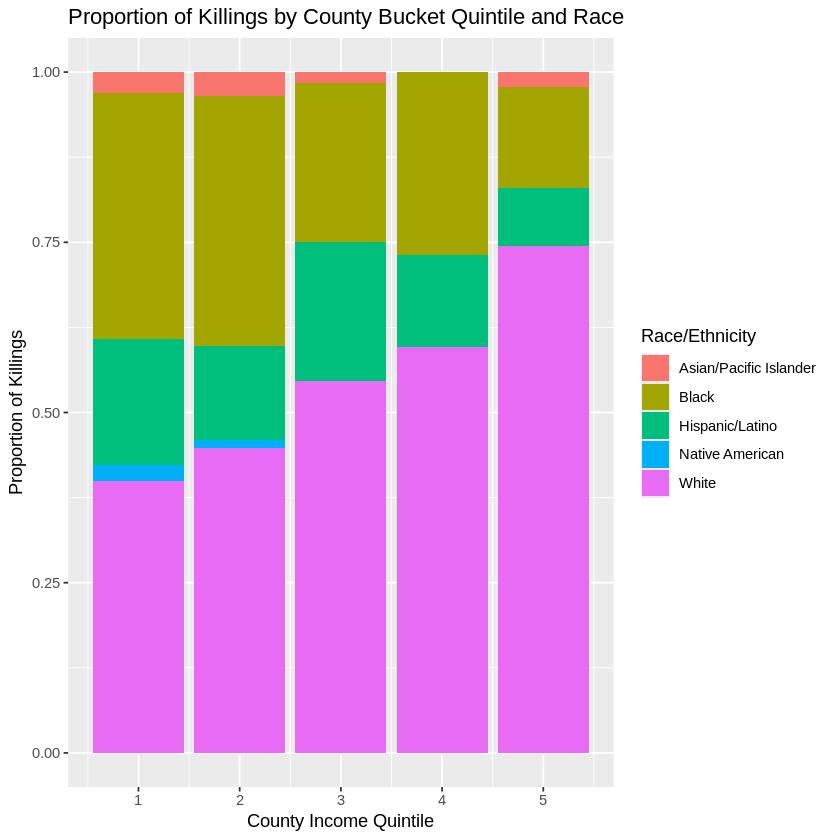

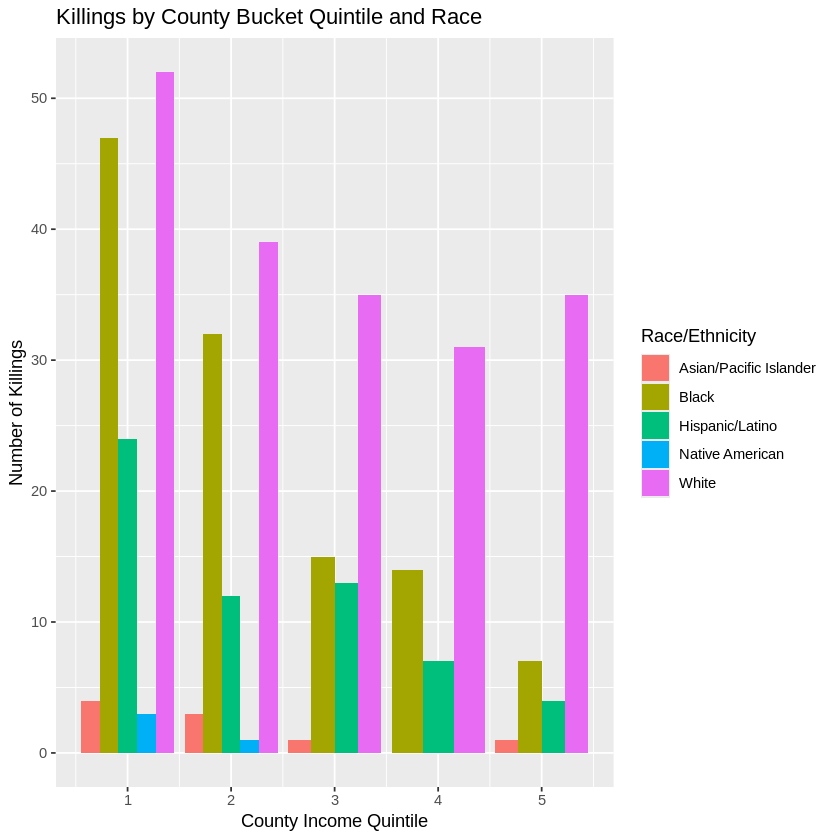

In [ ]:
# prompt: fill by county bucket quintile

# Assuming 'county_bucket' is already a factor or has been converted
# If not, uncomment the following line:
# police_killings_clean$county_bucket <- as.factor(police_killings_clean$county_bucket)


ggplot(police_killings_clean, aes(x = county_bucket, fill = raceethnicity)) +
  geom_bar() +
  labs(title = "Killings by County Bucket Quintile and Race",
       x = "County Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")


# For a stacked bar chart:
ggplot(police_killings_clean, aes(x = county_bucket, fill = raceethnicity)) +
  geom_bar(position = "fill") + # Use position = "fill" for proportions
  labs(title = "Proportion of Killings by County Bucket Quintile and Race",
       x = "County Income Quintile",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity")

#For a dodged bar chart:
ggplot(police_killings_clean, aes(x = county_bucket, fill = raceethnicity)) +
  geom_bar(position = "dodge") +
  labs(title = "Killings by County Bucket Quintile and Race",
       x = "County Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

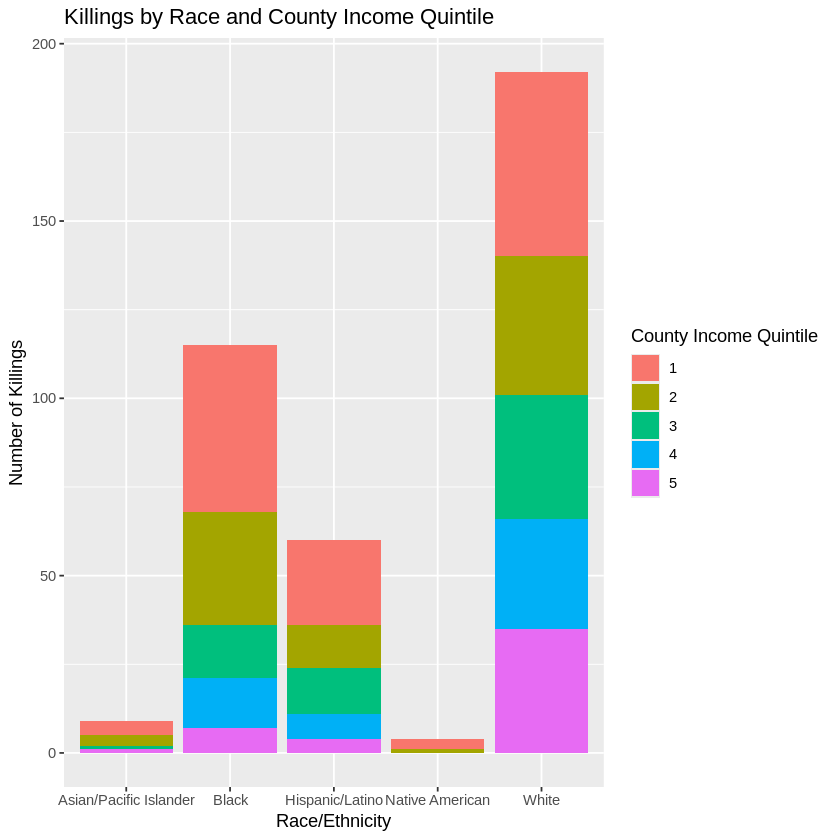

In [ ]:
# prompt: instead of income quintile on the x make it raceethnicity and do color by county income quintile

ggplot(police_killings_clean, aes(x = raceethnicity, fill = as.factor(county_bucket))) +
  geom_bar() +
  labs(title = "Killings by Race and County Income Quintile",
       x = "Race/Ethnicity",
       y = "Number of Killings",
       fill = "County Income Quintile")

by age?
distribution of killings per race by age

In [79]:
head(police_killings_clean)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,comp_income,county_bucket,nat_bucket,pov,urate,college,whitepop,blackpop,hispanicpop,n_killings
,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,0.9379359,3,3,14.1,0.09768638,0.16850951,2286.295,1152.595,211.624,15
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.6834107,2,1,28.8,0.06572379,0.11140236,1489.722,1002.378,13.845,39
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,0.8258693,2,3,14.6,0.16629314,0.14731227,3010.302,314.083,685.272,39
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,0.8638144,3,3,11.7,0.12482727,0.05013293,52.116,26.058,4290.884,13
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.3848678,5,4,1.9,0.06354983,0.40395421,6298.325,95.326,115.753,35
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,0.3887044,1,1,58,0.07365145,0.10295519,327.740,360.514,3698.780,52


In [76]:
# prompt: convert age to numeric

police_killings_clean <- police_killings_clean %>%
  mutate(age = as.numeric(age))

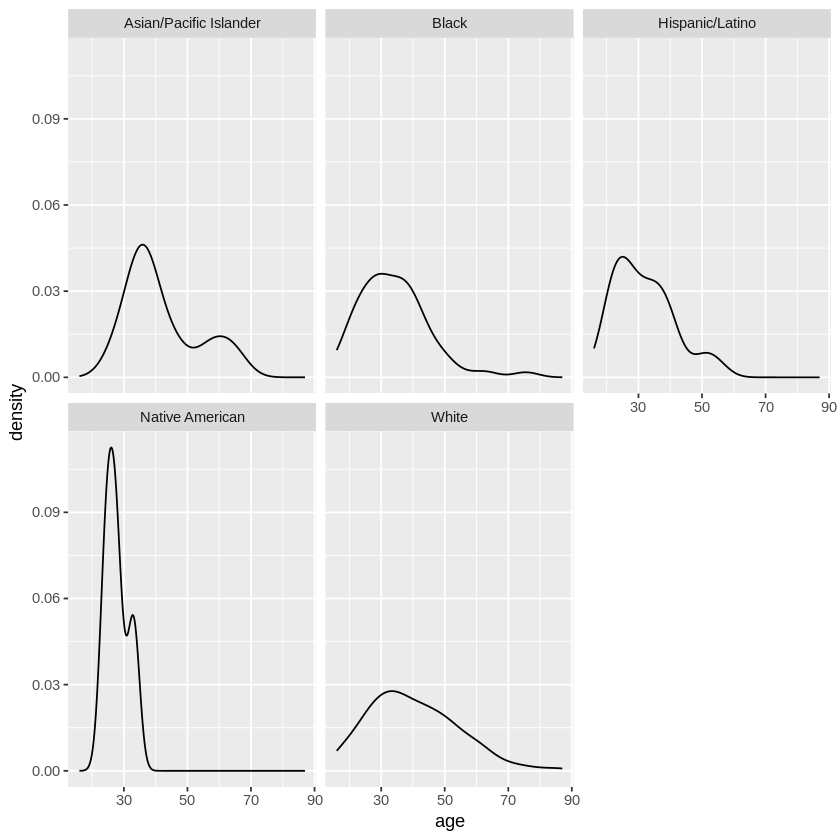

In [98]:
# prompt: distribution of age

police_killings_clean %>%
  ggplot()+
  aes(x = age)+
  geom_density()+
  facet_wrap(~ raceethnicity)

In [ ]:
# prompt: what question should i ask next

# Consider these questions:

# 1.  Data Exploration and Cleaning:
#  * How many missing values are there in each column?
#  * What are the unique values for the 'raceethnicity' and 'manner_of_death' columns?
#  * Are there any outliers or inconsistencies in the data that need addressing?
#  * What is the distribution of ages in the dataset?

# 2. Visualization Enhancements:
# * Can we improve the readability of the bar chart (e.g. add labels, change colors)?
#  * How does the distribution of raceethnicity vary across different states or cities?
#  * Create a visualization showing the relationship between age and manner of death.
#  * Is there a correlation between the victim's mental illness status and the outcome?

# 3.  Statistical Analysis:
# * What is the proportion of killings for each raceethnicity group?
# * Are there significant differences in killing rates among different racial groups?
# * Is there a correlation between the manner of death and the victim's raceethnicity?

# 4. Addressing Ethical Considerations:
# * How might biases in data collection impact the results?
# * What are some limitations of the data, and how might they affect our conclusions?
# * What are some potential next steps in analyzing the data, and what additional data sources could be helpful?

# Example of a more specific question based on the provided code:
# "How can I order the bars in the bar chart of raceethnicity by frequency to improve readability?"
